In [ ]:
# This is a Python block

# Pre-processing

## Read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from datetime import datetime

In [ ]:
file = 'a105dataset.csv'
efile = 'pre105.csv'
df = pd.read_csv(file, encoding = 'utf8')
c = df.columns.to_list()
c[42:47] = ['e_Green', 'cs_metro300', 'cs_metro300multi', 'cs_metro500', 'cs_metro500multi']
c

['Region',
 'County Name',
 'Township Name',
 'Village Name',
 'c_Population',
 'c_Sex Ratio',
 'c_Population Density',
 'c_Dependency Ratio',
 'c_Child Dependency Ratio',
 'c_Elderly Dependency Ratio',
 'c_Aging Index',
 'c_Population aged 0-14',
 'c_Population aged 15-64',
 'c_Population aged 65 and above',
 'j_15 with Doctorate Degree',
 'j_15 with Master Degree',
 'j_15 with University Education',
 'j_15 with Vocational Education',
 'j_15 with Senior High School Education',
 'j_15 with Junior High School Education',
 'j_15 with Elementary School Education',
 'j_15 with Self-Taught Education',
 'j_15 who are Illiterate',
 'c_15 who are Unmarried',
 'c_15 who are Married',
 'c_15 who are Divorced',
 'c_Natural Increase',
 'c_Social Increase',
 'c_Total Number of Households',
 'ji_Total Comprehensive Income',
 'ji_Average Comprehensive Income',
 'ji_Median Comprehensive Income',
 'ji_Comprehensive Income Q1',
 'ji_Comprehensive Income Q3',
 'ji_Comprehensive Income std',
 'ji_Total Am

In [ ]:
finalcol = ['Region', 'County Name', 'Township Name', 'Village Name', 'c_pop_Population', 'c_ratio_Sex Ratio', 'c_popcal_Population Density', 'c_ratio_Dependency Ratio', 'c_ratio_Child Dependency Ratio', 'c_ratio_Elderly Dependency Ratio', 'c_ratio_Aging Index', 'c_pop_Population aged 0-14', 'c_pop_Population aged 15-64', 'c_pop_Population aged 65 and above', 'j_edu_15 with Doctorate Degree', 'j_edu_15 with Master Degree', 'j_edu_15 with University Education', 'j_edu_15 with Vocational Education', 'j_edu_15 with Senior High School Education', 'j_edu_15 with Junior High School Education', 'j_edu_15 with Elementary School Education', 'j_edu_15 with Self-Taught Education', 'j_edu_15 who are Illiterate', 'c_marrital_15 who are Unmarried', 'c_marrital_15 who are Married', 'c_marrital_15 who are Divorced', 'c_popcal_Natural Increase', 'c_popcal_Social Increase', 'c_popcal_Total Number of Households', 'j_income_Total Comprehensive Income', 'j_income_Average Comprehensive Income', 'j_income_Median Comprehensive Income', 'j_income_Comprehensive Income Q1', 'j_income_Comprehensive Income Q3', 'j_income_Comprehensive Income std', 'j_income_Total Amount of Various Types of Income', 'j_income_Income from Wages and Salaries', 'h_Median Housing Price with parking space', 'h_Median Housing Price no parking space', 'ht_NO2', 'ht_PM2.5', 'e_Water', 'e_Green', 'cs_trans_Metro 300', 'cs_trans_Metro 300 Multi', 'cs_trans_Metro 500', 'cs_trans_Metro 500 Multi', 's_Fire', 's_Police', 'cs_school_Primary', 'cs_school_Secondary', 'cs_leisure_Gym', 'e_Area', 'ht_Hospital', 's_Shelter']

In [ ]:
combine = pd.DataFrame([], columns=finalcol)
combine

,Region,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,cs_trans_Metro 500,cs_trans_Metro 500 Multi,s_Fire,s_Police,cs_school_Primary,cs_school_Secondary,cs_leisure_Gym,e_Area,ht_Hospital,s_Shelter


In [ ]:
allFileList = os.listdir("./")
dflist = []
for file in allFileList:
    if 'a10' in file:
        print(file)

a107dataset.csv
a105dataset.csv
a109dataset.csv
a108dataset.csv
a106dataset.csv


In [ ]:
allFileList = os.listdir("./")
dflist = []
for file in allFileList:
    if 'a10' in file:
        df = pd.read_csv(file)
        df = pd.DataFrame(df.values, columns=finalcol)
        df['Region']=file[1:4]
        dflist.append(df.rename(columns={'Region':'Year'}))
combine = pd.concat(dflist)
combine

,Year,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,cs_trans_Metro 500,cs_trans_Metro 500 Multi,s_Fire,s_Police,cs_school_Primary,cs_school_Secondary,cs_leisure_Gym,e_Area,ht_Hospital,s_Shelter
0,107,新北市,三峽區,三峽里,322,138.52,10043.67,49.77,16.74,33.02,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,38370.0,2.0,0.0
1,107,新北市,三峽區,中埔里,3317,97.68,4570.29,30.54,20.27,10.27,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1387444.0,2.0,1.0
2,107,新北市,三峽區,中正里,5518,100.44,5550.64,29.35,16.78,12.56,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1477467.0,1.0,1.0
3,107,新北市,三峽區,二鬮里,3749,102.32,1866.7,27.39,14.54,12.84,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6382624.0,0.0,0.0
4,107,新北市,三峽區,五寮里,950,116.89,67.4,44.82,11.74,33.08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13730198.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,106,臺北市,萬華區,錦德里,5795,95.64,40423.28,40.59,16.86,23.73,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,146758.0,1.0,36.0
1484,106,臺北市,萬華區,雙園里,4884,98.7,31360.16,42.81,20.41,22.4,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,154396.0,2.0,79.0
1485,106,臺北市,萬華區,青山里,5889,97.75,18017.94,39.81,12.82,26.99,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,347914.0,2.0,120.0
1486,106,臺北市,萬華區,頂碩里,7561,100.66,46659.3,40.88,16.42,24.46,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,162940.0,2.0,98.0


In [ ]:
combine.to_csv('origin_dataset.csv')

## Data transformation

### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in range(105,110):
    combine.iloc[:,4:][combine['Year']==str(i)] = scaler.fit_transform(combine[combine['Year']==str(i)].iloc[:,4:])

combine

/tmp/ipykernel_37/3527135981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine.iloc[:,4:][combine['Year']==str(i)] = scaler.fit_transform(combine[combine['Year']==str(i)].iloc[:,4:])
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

,Year,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,cs_trans_Metro 500,cs_trans_Metro 500 Multi,s_Fire,s_Police,cs_school_Primary,cs_school_Secondary,cs_leisure_Gym,e_Area,ht_Hospital,s_Shelter
0,107,新北市,三峽區,三峽里,0.007265,0.712531,0.08323,0.477214,0.326872,0.417373,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000208,0.285714,0.0
1,107,新北市,三峽區,中埔里,0.13679,0.272492,0.037859,0.146518,0.420605,0.039528,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.007535,0.285714,0.003876
2,107,新北市,三峽區,中正里,0.231977,0.30223,0.045985,0.126053,0.327934,0.077562,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.008024,0.142857,0.003876
3,107,新北市,三峽區,二鬮里,0.155473,0.322487,0.015448,0.092347,0.268455,0.082212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.034664,0.0,0.0
4,107,新北市,三峽區,五寮里,0.034425,0.479474,0.000533,0.392089,0.194105,0.418369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.074569,0.0,0.003876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,106,臺北市,萬華區,錦德里,0.261979,0.264683,0.328391,0.327858,0.36303,0.28132,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000797,0.142857,0.139535
1484,106,臺北市,萬華區,雙園里,0.21964,0.299177,0.254758,0.364323,0.457722,0.258464,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000839,0.285714,0.306202
1485,106,臺北市,萬華區,青山里,0.266348,0.288468,0.14636,0.315046,0.255268,0.337343,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00189,0.285714,0.465116
1486,106,臺北市,萬華區,頂碩里,0.344054,0.321272,0.379055,0.332622,0.351294,0.293865,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000885,0.285714,0.379845


### Normal Distribution

In [ ]:
from scipy import stats
for j in range(105,110):
    for i in combine[combine['Year']==str(j)].columns[4:39]:

        dftemp = combine[combine['Year']==str(j)][i].astype(float)
        dft, _ = stats.boxcox(dftemp+1)
        combine[combine['Year']==str(j)][i] = dft
combine

/tmp/ipykernel_37/1304433562.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine[combine['Year']==str(j)][i] = dft


,Year,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,cs_trans_Metro 500,cs_trans_Metro 500 Multi,s_Fire,s_Police,cs_school_Primary,cs_school_Secondary,cs_leisure_Gym,e_Area,ht_Hospital,s_Shelter
0,107,新北市,三峽區,三峽里,0.007265,0.712531,0.08323,0.477214,0.326872,0.417373,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000208,0.285714,0.0
1,107,新北市,三峽區,中埔里,0.13679,0.272492,0.037859,0.146518,0.420605,0.039528,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.007535,0.285714,0.003876
2,107,新北市,三峽區,中正里,0.231977,0.30223,0.045985,0.126053,0.327934,0.077562,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.008024,0.142857,0.003876
3,107,新北市,三峽區,二鬮里,0.155473,0.322487,0.015448,0.092347,0.268455,0.082212,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.034664,0.0,0.0
4,107,新北市,三峽區,五寮里,0.034425,0.479474,0.000533,0.392089,0.194105,0.418369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.074569,0.0,0.003876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,106,臺北市,萬華區,錦德里,0.261979,0.264683,0.328391,0.327858,0.36303,0.28132,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000797,0.142857,0.139535
1484,106,臺北市,萬華區,雙園里,0.21964,0.299177,0.254758,0.364323,0.457722,0.258464,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000839,0.285714,0.306202
1485,106,臺北市,萬華區,青山里,0.266348,0.288468,0.14636,0.315046,0.255268,0.337343,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.00189,0.285714,0.465116
1486,106,臺北市,萬華區,頂碩里,0.344054,0.321272,0.379055,0.332622,0.351294,0.293865,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000885,0.285714,0.379845


### Categorical data

In [ ]:
#combine
combine = pd.read_csv('origin_dataset.csv', encoding='utf-8').drop(columns=['Unnamed: 0'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
ans = enc.fit_transform(combine.iloc[:,1:3]).toarray()
col = []

for i in range(41):
    if i == 0:
        col.append('County Name_Taipei')
    else:
        col.append('Township Name_'+combine['Township Name'].unique()[i-1])
combine[col] = ans

combine.head()

,Year,County Name,Township Name,Village Name,c_pop_Population,c_ratio_Sex Ratio,c_popcal_Population Density,c_ratio_Dependency Ratio,c_ratio_Child Dependency Ratio,c_ratio_Elderly Dependency Ratio,...,Township Name_中正區,Township Name_信義區,Township Name_內湖區,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區
0,107,新北市,三峽區,三峽里,322,138.52,10043.67,49.77,16.74,33.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,新北市,三峽區,中埔里,3317,97.68,4570.29,30.54,20.27,10.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,107,新北市,三峽區,中正里,5518,100.44,5550.64,29.35,16.78,12.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,新北市,三峽區,二鬮里,3749,102.32,1866.70,27.39,14.54,12.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107,新北市,三峽區,五寮里,950,116.89,67.40,44.82,11.74,33.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
combine.to_csv('origin_dataset.csv')

In [ ]:
combine.to_csv('dataset.csv')

## Feature Engineer for QoL

In [ ]:
dfsort = combine.reindex(sorted(combine.columns), axis=1)
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7440 entries, 0 to 1487
Data columns (total 96 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   County Name                                       7440 non-null   object 
 1   County Name_1                                     7440 non-null   float64
 2   Township Name                                     7440 non-null   object 
 3   Township Name_三峽區                                 7440 non-null   float64
 4   Township Name_三芝區                                 7440 non-null   float64
 5   Township Name_三重區                                 7440 non-null   float64
 6   Township Name_中和區                                 7440 non-null   float64
 7   Township Name_中山區                                 7440 non-null   float64
 8   Township Name_中正區                                 7440 non-null   float64
 9   Township Name_五股區  

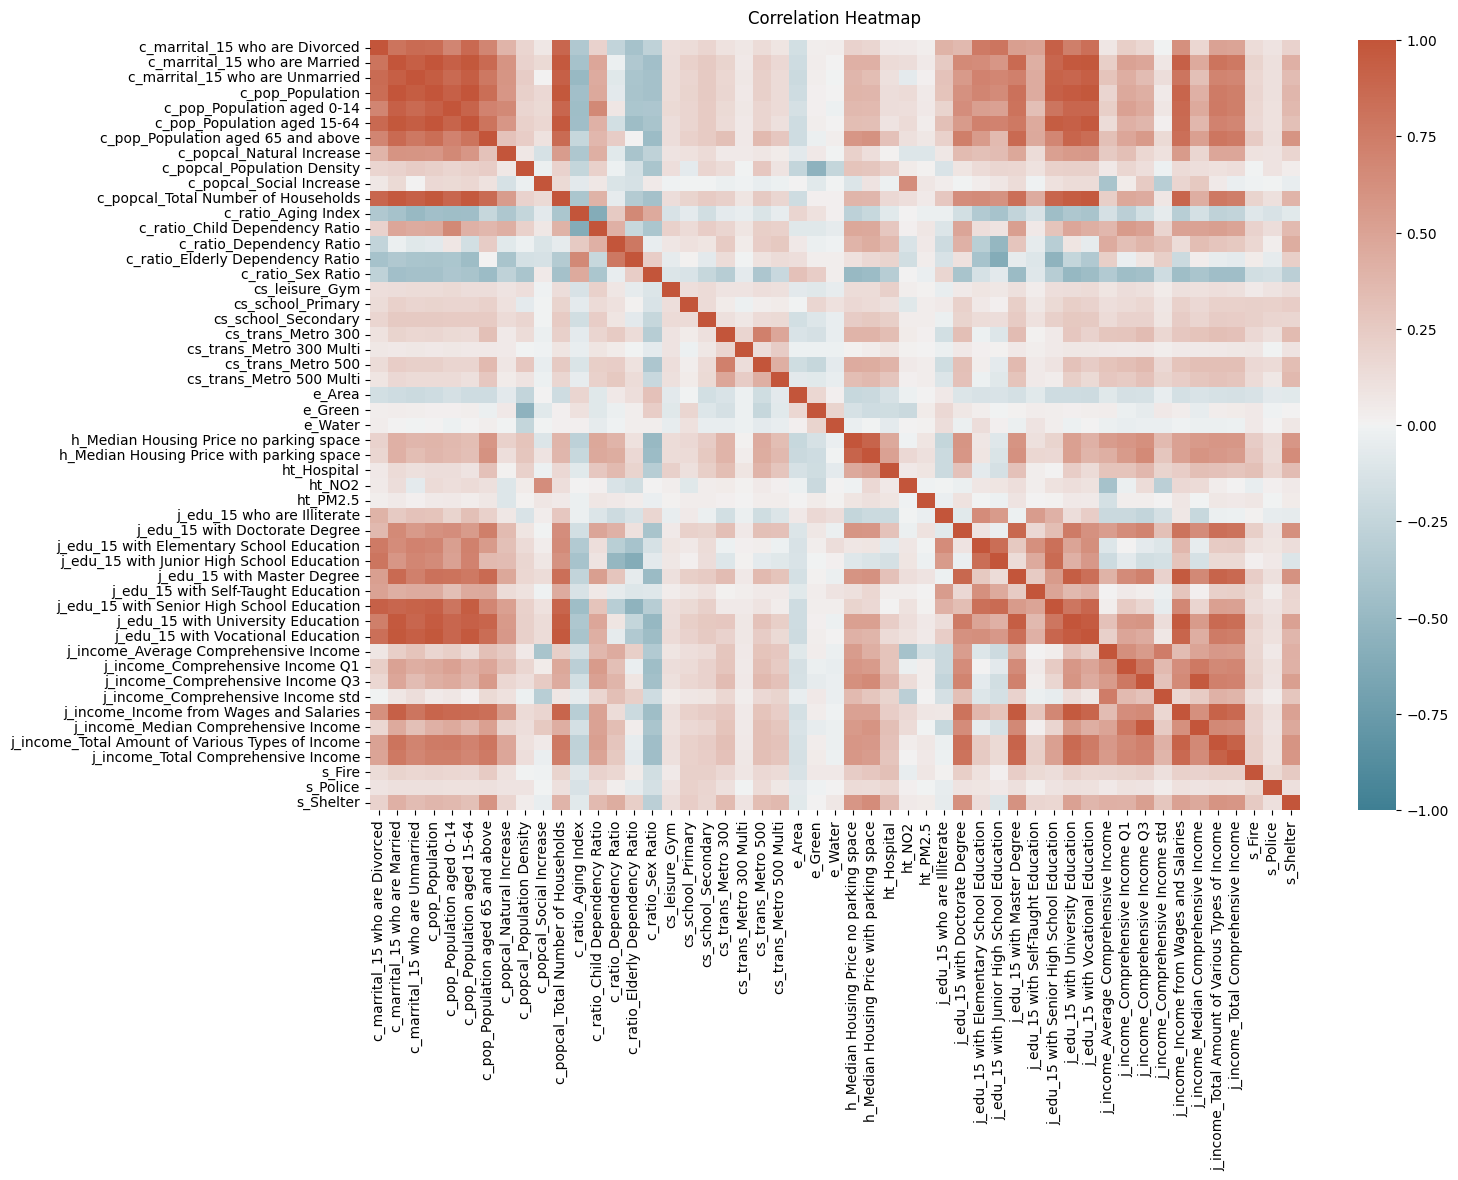

In [ ]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(dfsort.iloc[:, 45:].astype('float').corr(), vmin=-1, vmax=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
from sklearn.decomposition import PCA
import matplotlib
firstL = ['c_', 'j_']
qol = combine.copy()
for i in range(2):
    filt = combine.filter(regex=firstL[i])
    pca = PCA(5).fit(filt)
    X_pca1=pca.transform(filt) 
    qol[[firstL[i]+str(1), firstL[i]+str(2), firstL[i]+str(3), firstL[i]+str(4), firstL[i]+str(5)]] = X_pca1

In [ ]:
qol.columns

Index(['Year', 'County Name', 'Township Name', 'Village Name',
       'c_pop_Population', 'c_ratio_Sex Ratio', 'c_popcal_Population Density',
       'c_ratio_Dependency Ratio', 'c_ratio_Child Dependency Ratio',
       'c_ratio_Elderly Dependency Ratio',
       ...
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'j_1', 'j_2', 'j_3', 'j_4', 'j_5'],
      dtype='object', length=106)

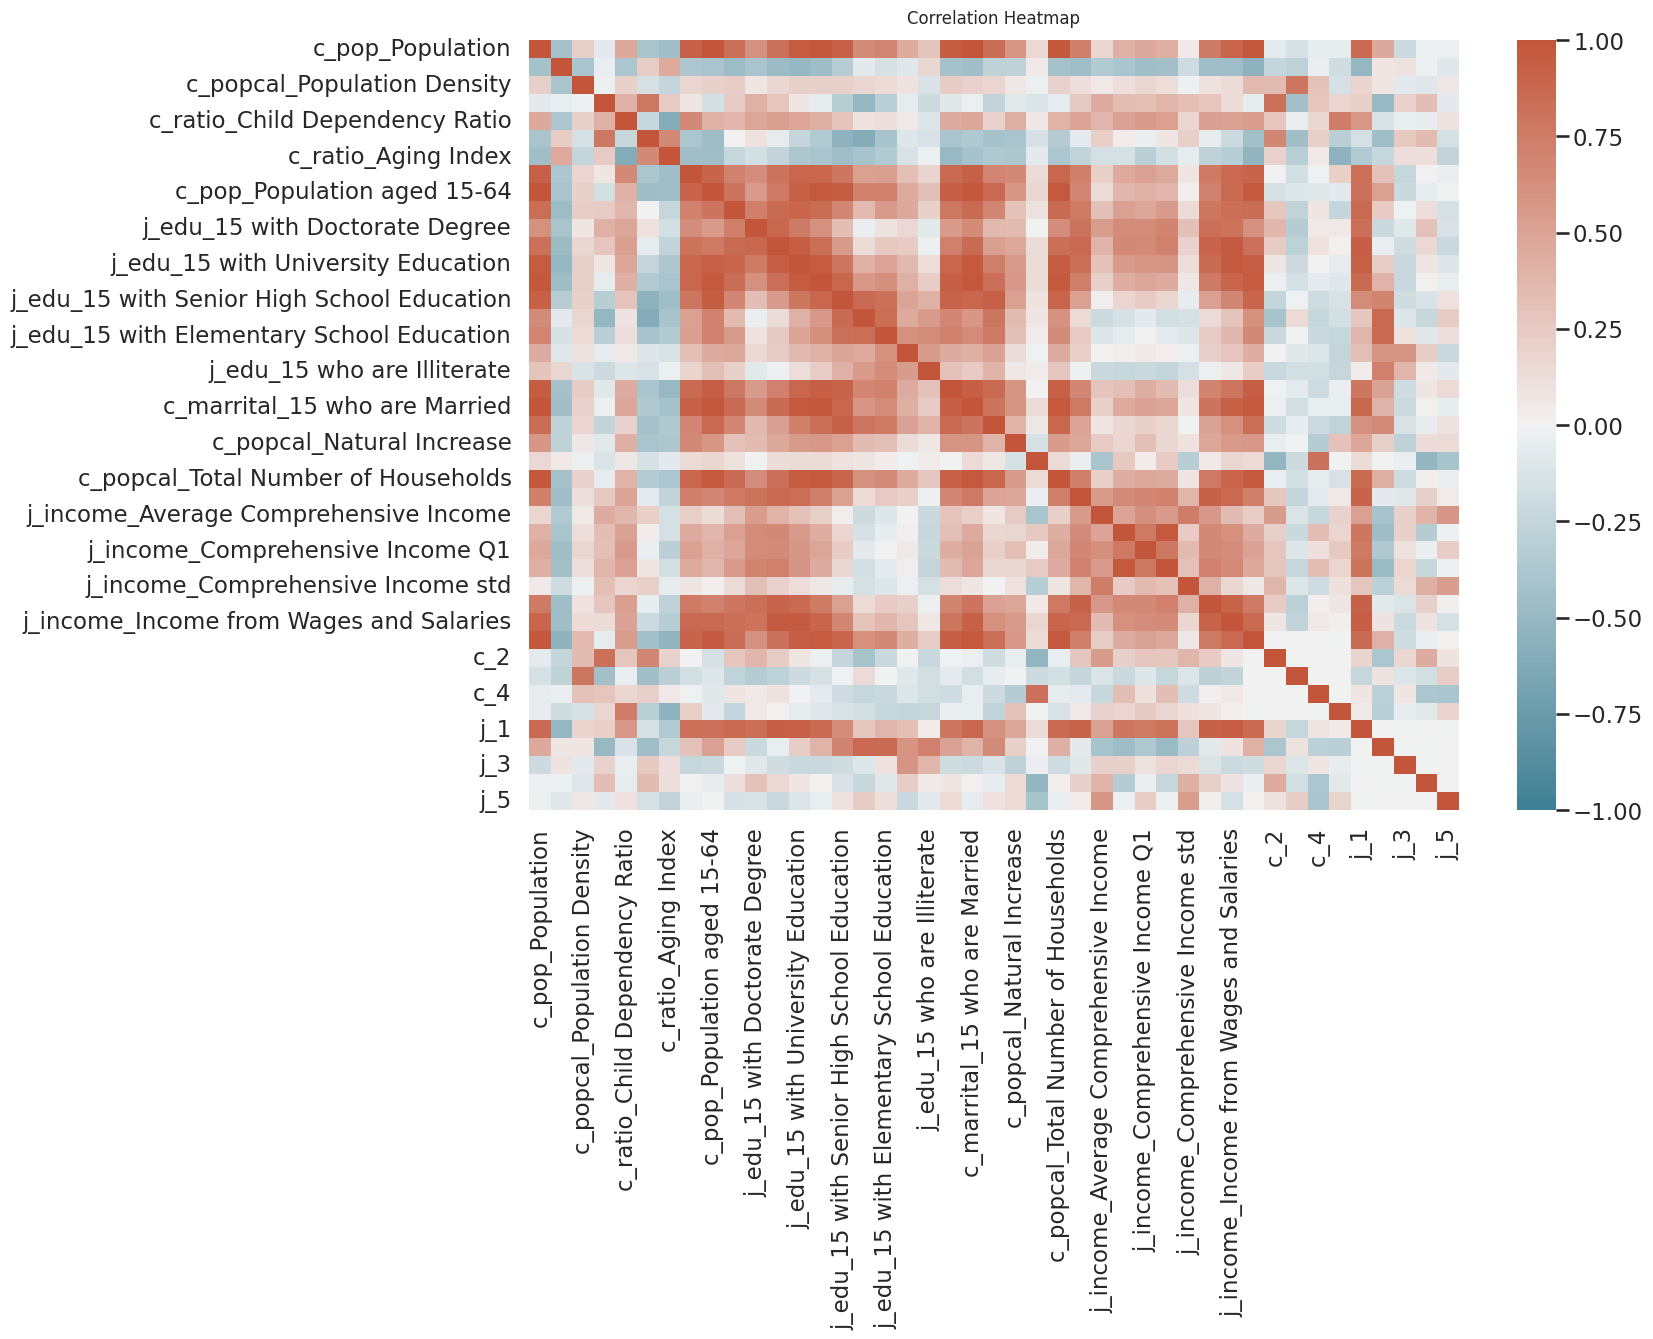

In [ ]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(qol.filter(regex='c_|j_').astype('float').corr(), vmin=-1, vmax=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c47260a-17d6-4d14-9981-5d7482bf95e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>